-Notes
pie(): plot a pie chart.
Common parameters:
y - Column label or position. This is used to provide data points for the pie.
labels - Indexes to use for labeling the wedges with their corresponding data values.
colors - A list of colors to use for the different sections of the pie.
autopct - A string or function used to label the wedges with their numeric value. The label will be placed inside the wedge.
startangle - Rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
explode - An array which specifies the fraction of the radius with which to offset each wedge.
Syntax: plt.pie(df['data'], labels=df['category'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'yellow'], explode=(0.1, 0, 0, 0))
Chart shows how individual parts make up a whole.

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Text(0.5, 1.0, 'Work From Home Status')

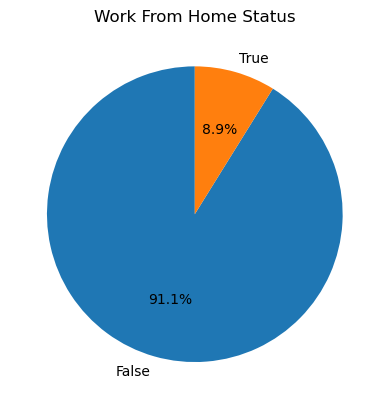

In [ ]:
##Lets now visualize a pie chart and for this we are going to use the job_work_from_home column as it as only boolean values true or false
#startangle=90 gives us the orientation telling from where to start
#autopct is used to show in percent the starting % indicates its percentage, 1.1 indicates its decimal with one decimal point and
# f indicates its float and at end %% gives us that percent sign(%)

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.ylabel('')
plt.title('Work From Home Status')

In [14]:

df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


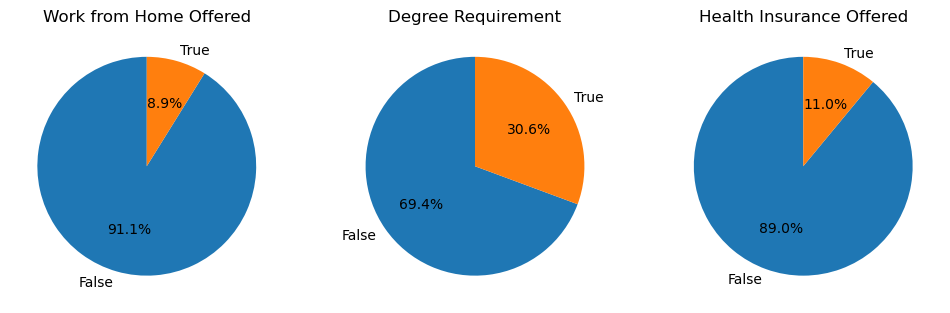

In [18]:
# Create a dictionary that maps column names in the dataframe (df) to human-readable chart titles.
# This lets us loop through multiple columns and give each subplot a descriptive title.
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create a figure with 1 row and 3 subplots (axes) side by side, since there are 3 items in dict_column.
fig, ax = plt.subplots(1, 3)

# Set the figure size to make the 3 subplots readable (12 inches wide, 5 inches tall).
fig.set_size_inches((12, 5))

# Loop through the dictionary items (column name, chart title) with index i for subplot selection.
for i, (column, title) in enumerate(dict_column.items()):
    # Plot a pie chart on the i-th subplot using value counts of the column (True/False values).
    # - labels=['False','True'] ensures the slices are labeled consistently.
    # - autopct='%1.1f%%' shows percentages on the slices with 1 decimal.
    # - startangle=90 rotates the chart for better readability.
    # i goes from 0 → 2 (since there are 3 items in your dictionary).
    # ax[i] selects the correct subplot (first, second, or third) to draw the pie chart.
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    
    # Set the title of the subplot to the descriptive name from the dictionary.
    ax[i].set_title(title)

# Render the full figure with the 3 pie charts.
plt.show()
